# Linear Regression Walkthrough

In [2]:
# The usual imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [4]:
# Load the data into a frame
df = pd.read_csv("./reg_data.csv")
print(df.head(5))

           X          Y
0  32.502345  31.707006
1  53.426804  68.777596
2  61.530358  62.562382
3  47.475640  71.546632
4  59.813208  87.230925


In [5]:
# Standard ML data split, 80% training, 20% testing
x_train, x_test, y_train, y_test = train_test_split(df.X,df.Y,train_size=0.8)

For loop method: 1.3714111590497102
Sum method: 1.3714111590497102
5.593034744737835
1.3714111590497102


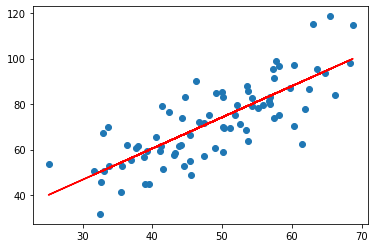

In [99]:
# 2 ways of doing the linear regression calculation to find a gradient

x_mean = df["X"].mean()
y_mean = df["Y"].mean()

b_u = 0 #Calculation Upper
b_l = 0 #Calculation Lower

for i in range(x_train.shape[0]):
    
    b_u += (x_train.values[i] - x_mean) * (y_train.values[i] - y_mean)
    b_l += (x_train.values[i] - x_mean)**2
    
b = b_u/b_l
print("For loop method: {}".format(b))

# I think this one is nicer

bupper = sum( (x_train - x_mean) * (y_train - y_mean) )
blower = sum( (x_train - x_mean)**2 )
bee = bupper/blower
print("Sum method: {}".format(bee))

# Calculate some constant to add to the gradient
a = y_mean - b * x_mean

print(a)
print(b)

# this is y= mx + c but written as
# y = a + bx
y = a + b * x_train.values

# Plot the prediction line
x = x_train
plt.plot(x, y, color="red")


# Show the training data to see if it's reasonable
plt.scatter(x_train, y_train)

In [41]:
# Splitting the data into classes, above or below our line
class_0 = []
class_1 = []

for i in range(x_test.shape[0]):
    
    if y_test.values[i] < (a + b * x_test.values[i]):
        class_0.append( (x_test.values[i], y_test.values[i]) )
    else:
        class_1.append( (x_test.values[i], y_test.values[i]) )
        

class_0 = np.array(class_0)
class_1 = np.array(class_1)

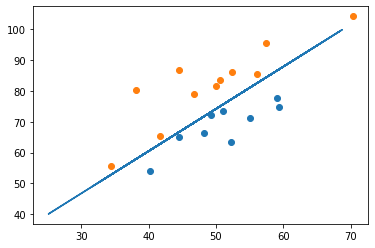

In [94]:
# Plotting the classes
plt.scatter(class_0[:,0], class_0[:,1])
plt.scatter(class_1[:,0], class_1[:,1])

# Add our prediction line
plt.plot(x,y)

# Wow, it's pretty good!

In [49]:
# Calculating the error for our line

err = 0
for i in range(x_test.shape[0]):
    err += abs( y_test.values[i] - (a + b * x_test.values[i]))
    
# Divide by mean to show the typical error
print(err / y_test.mean())

2.1023562620404683


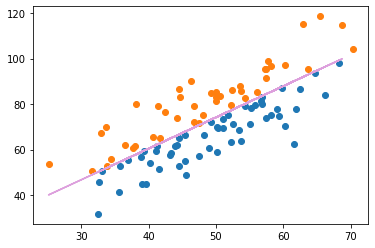

In [98]:
# Finally, show how well the prediction works on all the data


class_0 = []
class_1 = []

for i in range(df.X.shape[0]):
    
    if df.Y.values[i] < (a + b * df.X.values[i]):
        class_0.append( (df.X.values[i], df.Y.values[i]) )
    else:
        class_1.append( (df.X.values[i], df.Y.values[i]) )
        

class_0 = np.array(class_0)
class_1 = np.array(class_1)

# Plotting the classes
plt.scatter(class_0[:,0], class_0[:,1])
plt.scatter(class_1[:,0], class_1[:,1])

# Add our prediction line
plt.plot(x,y, color="plum")

# Wow, it's pretty good!